# Micro Credit

Problem Statement:
- A Microfinance Institution (MFI) is a business that provides financial services to low-income people. Microfinance services (MFS) are especially useful when targeting unbanked low income families living in remote areas with few sources of income. MFIs offer a variety of MFS such as Group Loans, Agricultural Loans, Individual Business Loans, and so on.
- Many microfinance institutions (MFI), experts, and funders support the idea of using micro financial services (MFS), which they believe are more convenient, efficient, and cost-effective than the traditional high-touch model used for delivering microfinance services for a long time. Despite the fact that the MFI industry is primarily focused on low-income families and is extremely beneficial in these areas, MFS implementation has been uneven, with significant challenges as well as successes.
- Presently, microfinance is broadly acknowledged as a tool for poverty reduction, with $70 billion in outstanding loans and a global client base of 200 million people.
- We are functioning with one such client that is in Telecom Industry from Indonesia. They operate a fixed wireless telecommunications network. They have launched a number of products and built their business and organisation around the budget operator model, offering better products at lower prices to all value-conscious customers through a disruptive innovation strategy that focuses on the subscriber
- They understand the value of interaction and how it affects a person's life, so they focus on providing products and services to low-income families and poor customers who are in need.
- They are working with an MFI to provide micro-credit on mobile balances that must be repaid in 5 days. If the consumer fails to repay the loaned amount within 5 days, he is considered to be a defaulter. Payback should be 6 (in Indonesian Rupiah) for a loan of 5 (in Indonesian Rupiah), and 10 (in Indonesian Rupiah) for a loan of 10. (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).
- The sample data is drawn from our client database. It is hereby made available to you for this exercise. The client wants some predictions to help them in further investment and customer selection improvement in order to improve the selection of customers for credit.
- Label Dataset: The dataset is skewed. Label ‘1' has approximately 87.5 percent of the records, while label ‘0' has approximately 0%. while, label ‘0’ has approximately 12.5% records.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import scipy.stats
stats = scipy.stats
import pylab

In [2]:
df= pd.read_csv('micro_credit.csv')

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Mostly all the columns are either int or float, except pcircle and pdate, we will leave encode pcircle as it is showing the telecom circle and we will be extracting date month year form pdate. This also shows that there are no null values in the dataset.

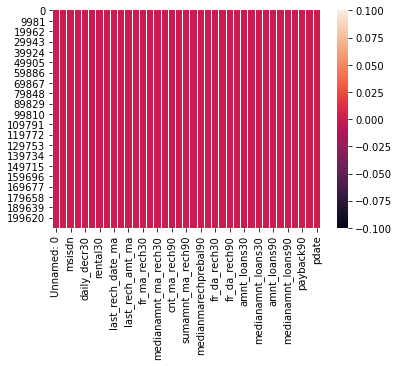

In [5]:
ax=sns.heatmap(df.isnull())
plt.show()

There are no null values in the dataset.

In [6]:
# dropping unnamed column as it has no significance in the data set.

df.drop("Unnamed: 0", axis=1,inplace=True)

In [7]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [8]:
#here we're checking if there are any other value in this column except UPW which is a network provider in Indonasia.
df['pcircle'].unique()

array(['UPW'], dtype=object)

This column "pcircle" can be dropped, as for now i'm keeping this column.

#here we'll be dropping msisndn which is mobile number and pcircle.
- as mobile number has no relation with the defaulters and the cellular network provider is one(i.e. UPW)

In [9]:
df.drop(['msisdn','pcircle'], axis=1 ,inplace= True)

In [10]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [11]:
df.shape

(209593, 34)

In [12]:
df.describe(include='all')

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-04
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3150
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN


- Here we see the count of the columns to be equal which means that there are no missing values in any of the columns.
- no columns have unique values except msisdn which is phone number of the customers.
- comparing mean, 75th percentile and max we see there are few outiers in columns of the dataset.

##### Feature Engineering

In [13]:
# extracting date month and year from pdate column.

df['date']=pd.to_datetime(df.pdate, format='%Y-%m-%d').dt.day
df['month']=pd.to_datetime(df.pdate, format='%Y-%m-%d').dt.month
df['year']=pd.to_datetime(df.pdate, format='%Y-%m-%d').dt.year

In [14]:
# dropping pdate

df.drop('pdate',axis=1,inplace=True)

In [15]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month,year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6,2016


In [16]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [17]:
df['year'].unique()

array([2016], dtype=int64)

In [18]:
# year has no unique value so we are dropping year from our dataset

df.drop(['year','date'],axis=1,inplace=True)

## EDA

#### Univariate Analysis

1    183431
0     26162
Name: label, dtype: int64


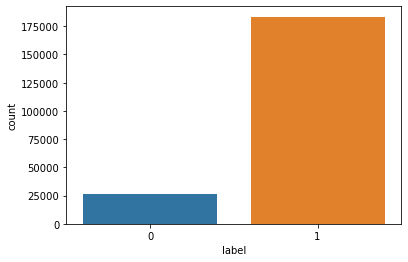

In [19]:
# label:: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

ax=sns.countplot(df['label'])
print(df['label'].value_counts())
plt.show()

There are 26162 customers who failed to pay the credit amount within 5 days.

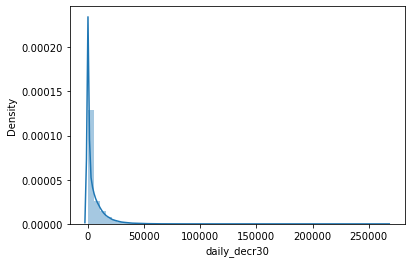

In [20]:
# daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

ax=sns.distplot(df['daily_decr30'])
plt.show()

The daily amount spent fro main account majorly lies between 0 Rupiah to 25000 Rupiah.

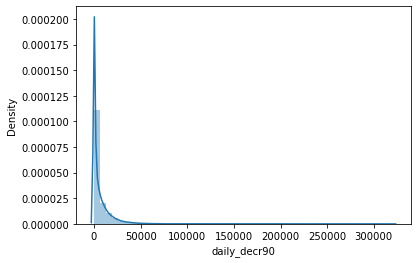

In [21]:
# daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

ax=sns.distplot(df['daily_decr90'])
plt.show()

The average amount spent over last 90 days is highly distributed between 0 to 25,000 Rupiah

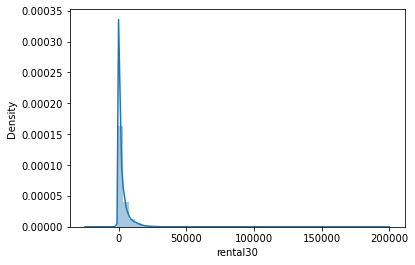

In [22]:
sns.distplot(df['rental30'])
plt.show()

the maximum user(customers) have zero as their Average main account balance over last 30 days.
- while there are many outliers in the data set

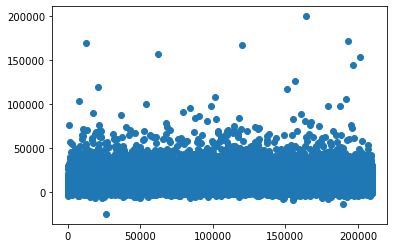

In [23]:
plt.scatter(df.index,df['rental90'])
plt.show()

The majority of people have 50,000 as average main account balance over last 90 days

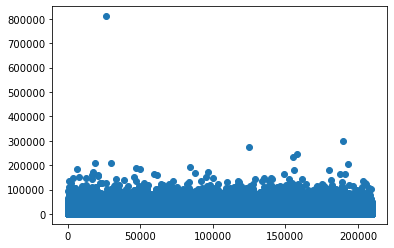

In [24]:
plt.scatter(df.index,df['sumamnt_ma_rech30'])

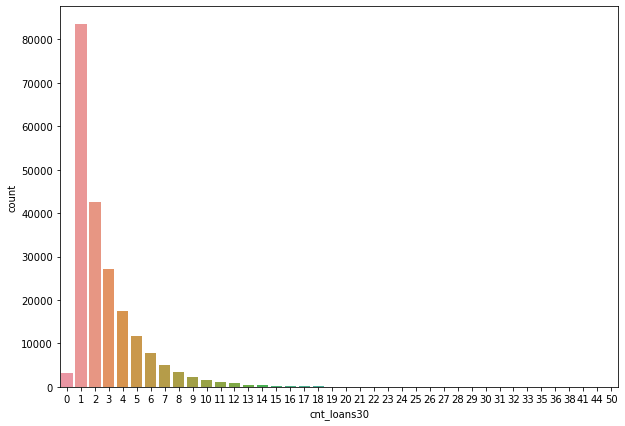

1     83432
2     42665
3     27050
4     17499
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
41        1
44        1
36        1
35        1
50        1
Name: cnt_loans30, dtype: int64

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(df['cnt_loans30'])
plt.show()
(df['cnt_loans30'].value_counts())

Mostly customers took 1-8 times loan.

In [26]:
df['amnt_loans30'].value_counts() 

6      76620
12     44384
18     26379
24     18403
30     11999
36      8559
42      5580
48      3994
0       3259
54      2660
60      2043
66      1402
72      1101
78       742
84       580
90       394
96       333
102      252
108      182
114      135
120      119
132       92
126       80
138       64
156       34
144       30
150       30
162       29
168       20
174       17
186       15
180       13
192        7
198        6
210        4
252        4
228        4
216        4
276        3
222        3
264        3
258        3
204        2
240        2
300        1
270        1
306        1
246        1
Name: amnt_loans30, dtype: int64

Majority 6 and 12 Rupiah Total amount of loans taken by user in last 30 days

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

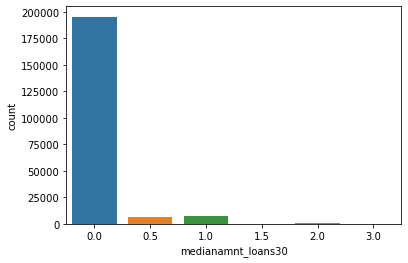

In [27]:
# The Median of amounts of loan taken by the user in last 30 days

sns.countplot(df['medianamnt_loans30'])
df['medianamnt_loans30'].value_counts()

medianamnt_loans30 is mostly at 0.0

0.000000     106712
2.000000       5601
3.000000       5023
4.000000       3931
2.500000       3518
              ...  
3.736842          1
80.333333         1
5.222222          1
50.750000         1
60.333333         1
Name: payback30, Length: 1363, dtype: int64

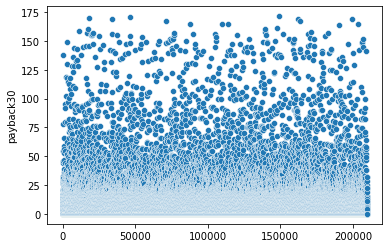

In [28]:
ax=sns.scatterplot(df.index,df['payback30'])
df['payback30'].value_counts()

payback has outliers and mostly the payback is within 4

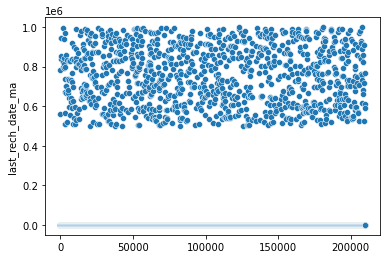

In [29]:
ax=sns.scatterplot(df.index,df['last_rech_date_ma'])

##### Bivariate Analysis

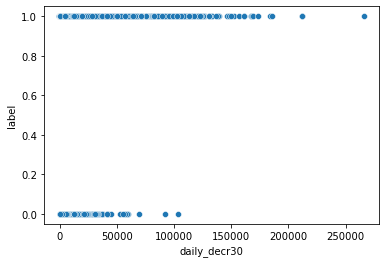

In [30]:
ax=sns.scatterplot(x='daily_decr30',y='label',data=df)
plt.show()

success rate is above 150000 while the  defaulters are under 70000
- this shows that the sucess is much higher than of defaulters.

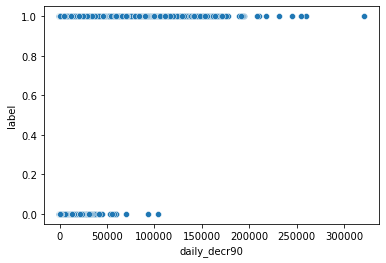

In [31]:
ax=sns.scatterplot(x='daily_decr90',y='label',data=df)
plt.show()

when comparing with 90 days of avg main account spend
- The success is more than 150000 while the defaulters are less than 60000
- There are few outliers in the data set and there are negative values.

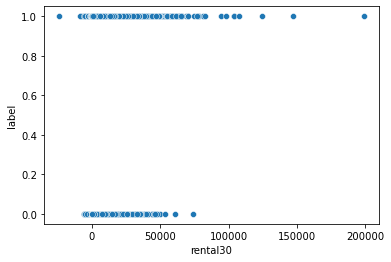

In [32]:
ax=sns.scatterplot(x='rental30',y='label',data=df)
plt.show()

While comparing Average main account balance over last 30 days with target variable, we see that
- Rate of Defaulters are less than successful rate  

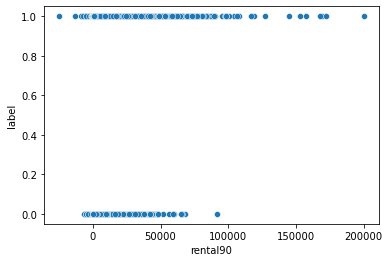

In [33]:
ax=sns.scatterplot(x='rental90',y='label',data=df)
plt.show()

The rental90 count is less for defaulters

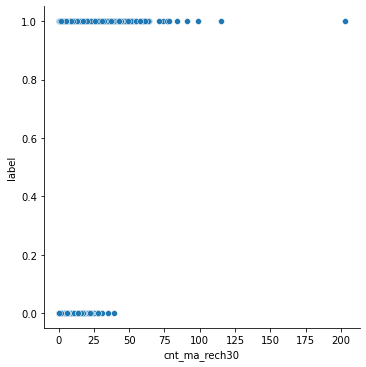

In [34]:
ax=sns.relplot(x='cnt_ma_rech30',y='label',data=df)
plt.show()

The last recharge is done more in sucessfull payers

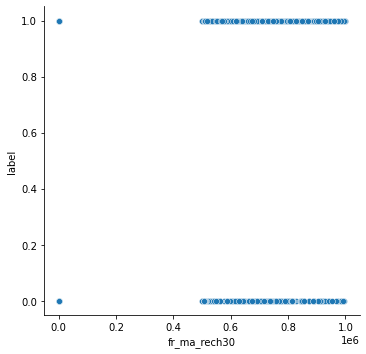

In [35]:
ax=sns.relplot(x='fr_ma_rech30',y='label',data=df)
plt.show()

The frecuency is almost equal in both the catogeries.

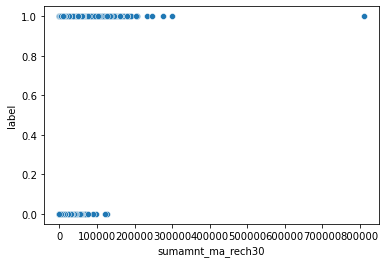

In [36]:
ax=sns.scatterplot(x='sumamnt_ma_rech30',y='label',data=df)
plt.show()

Total amount of recharge in main account over last 30 days is more for sucessful than defaulters

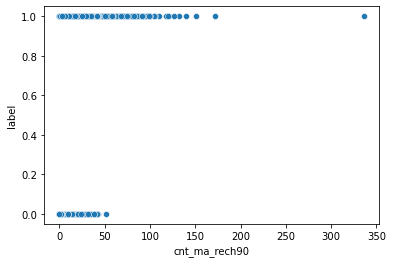

In [37]:
ax=sns.scatterplot(x='cnt_ma_rech90',y='label',data=df)
plt.show()

Number of times main account got recharged in last 90 days is very less for defaulters.

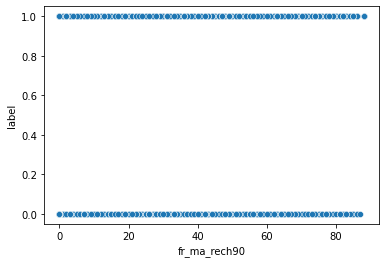

In [38]:
ax=sns.scatterplot(x='fr_ma_rech90',y='label',data=df)
plt.show()

Frequency is almost same for both.

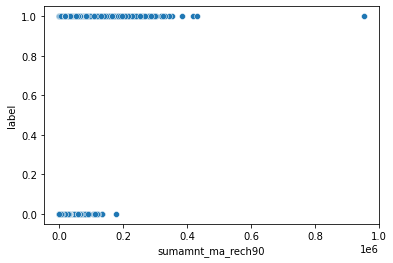

In [39]:
ax=sns.scatterplot(x='sumamnt_ma_rech90',y='label',data=df)
plt.show()

Total amount of recharge in main account over last 90 days is more in sucessfull that of defaulters

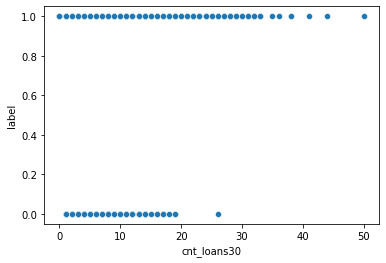

In [40]:
ax=sns.scatterplot(x='cnt_loans30',y='label',data=df)
plt.show()

Number of loans taken by user in last 30 days is comparitivly higher in sucessful than that of defaulters.

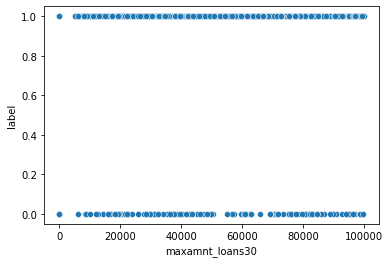

In [41]:
ax=sns.scatterplot(x='maxamnt_loans30',y='label',data=df)
plt.show()

maximum amount of loan taken by the user in last 30 days is aprox equal in both the labels

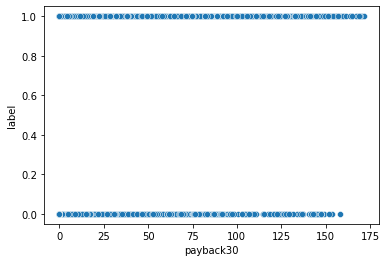

In [42]:
ax=sns.scatterplot(x='payback30',y='label',data=df)
plt.show()

Average payback time in days over last 30 days is more for sucessful than that of defaulters.

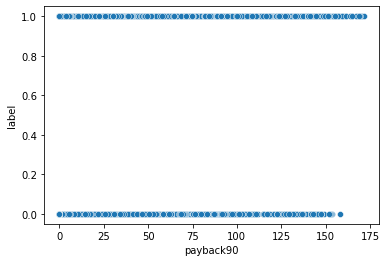

In [43]:
ax=sns.scatterplot(x='payback90',y='label',data=df)
plt.show()

Average payback time in days over last 90 days has a bit diffrence between sucessful and defaulters.

### MultiVariate Analysis

Text(0.5, 1.0, 'maxamnt_loans90 VS payback90')

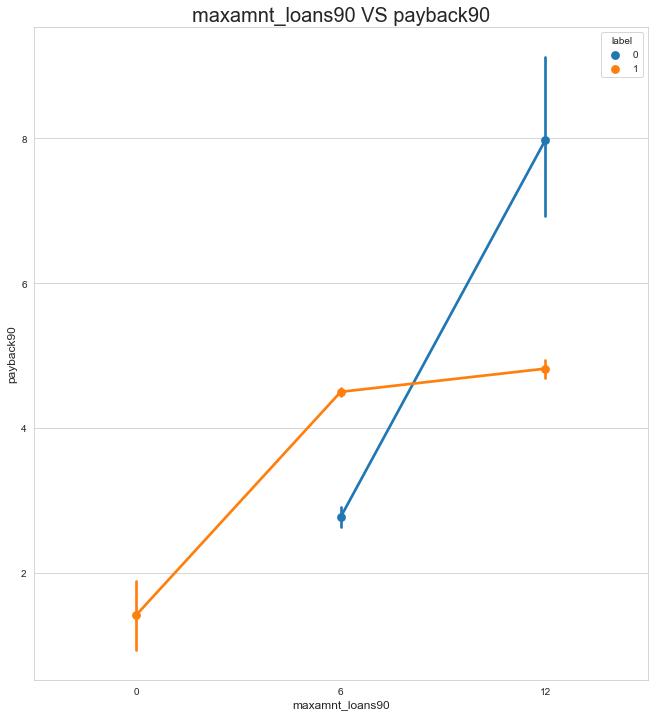

In [44]:
plt.figure(figsize=(11,12))
sns.set_style('whitegrid')
sns.pointplot(x='maxamnt_loans90', y='payback90', data=df, hue='label',join=True)
plt.xlabel('maxamnt_loans90',{'fontsize' : 'large'})
plt.ylabel('payback90',{'fontsize':'large'})
plt.title("maxamnt_loans90 VS payback90",{'fontsize':20})

In non-defaulters, we can see that as the maximum loan amount over the last 90 days increases, so does the payback time. Non-defaulters take less than 6 days to make a payment, whereas clients who have made a payment do so in 6 days or less.

Text(0.5, 1.0, 'maxamnt_loans90 VS aon')

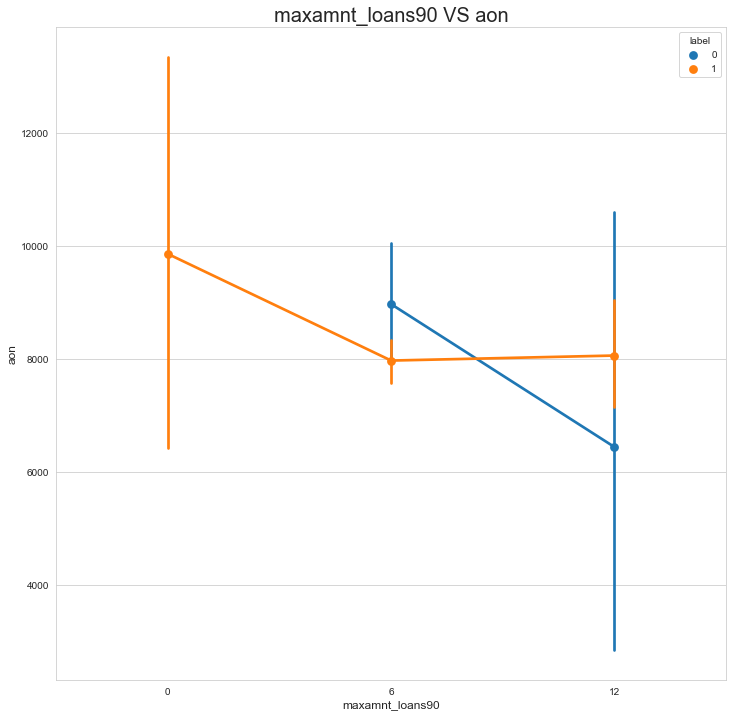

In [45]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.pointplot(x='maxamnt_loans90', y='aon', data=df, hue='label',join=True)
plt.xlabel('maxamnt_loans90',{'fontsize' : 'large'})
plt.ylabel('aon',{'fontsize':'large'})
plt.title("maxamnt_loans90 VS aon",{'fontsize':20})

By examine the relationship between the aon (age on the cellular network in days) and the maximum amount of loan in 90 days, we can see that mostly above 6000 or 8000 days, whatever the loan amount is, it has been paid back, indicating that they are non-defaulters. On the other hand, mostly below 6000 of aon people are defaulting on loan payments.As a result, we can identify the customers who will be able to repay their loan amount statistically based on aon.

#### Checking Correlation

In [46]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.154949
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,-0.001863
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.518664
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,0.539410
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.365699
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.429407
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,-0.001207
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,-0.001800
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.096919
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.156148


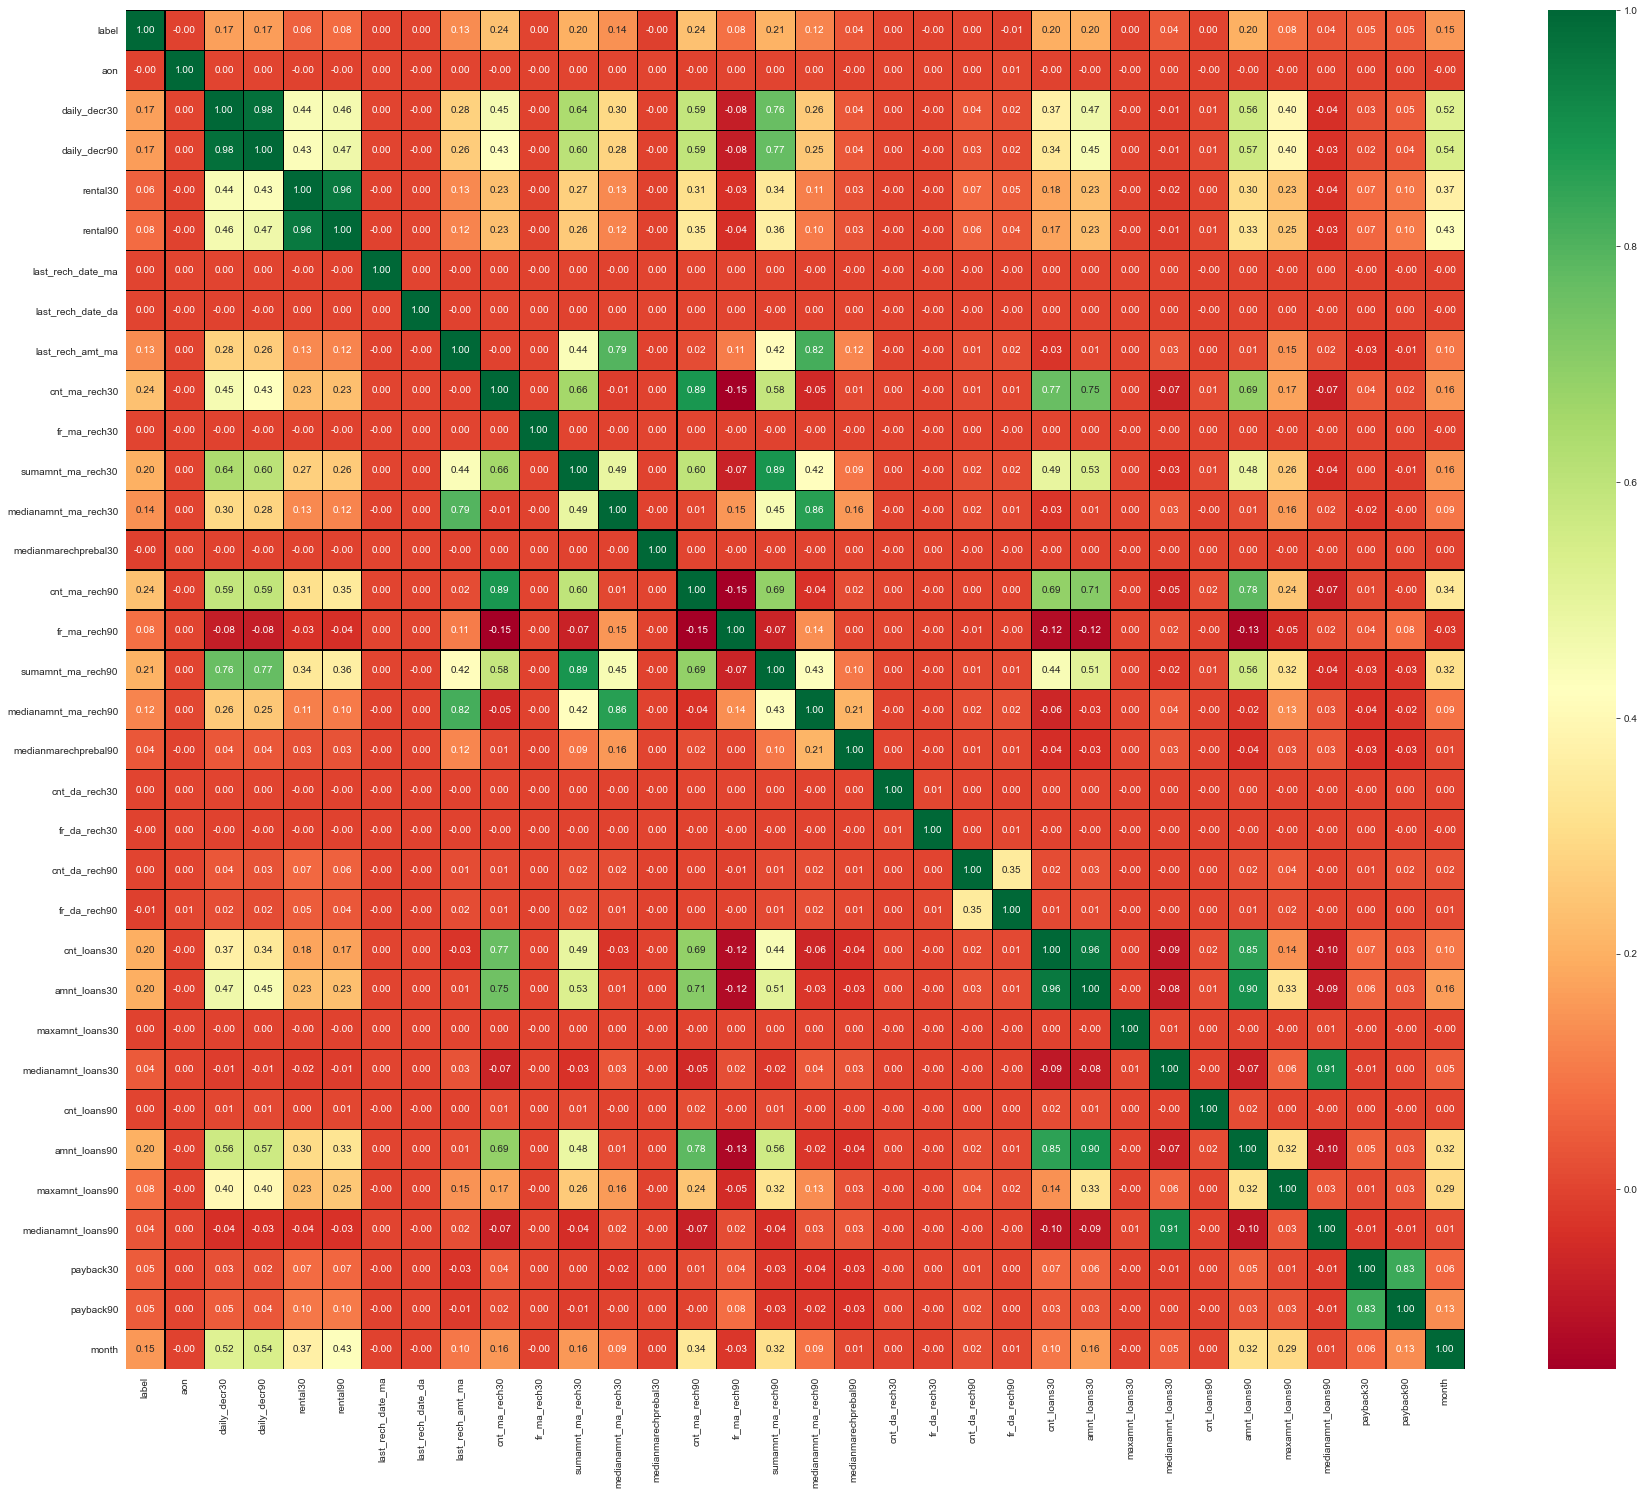

In [47]:
plt.subplots(figsize=(30,25))
sns.heatmap(df.corr(),annot=True, linewidths=0.1, linecolor="black", fmt="0.2f",cmap='RdYlGn')
plt.show()


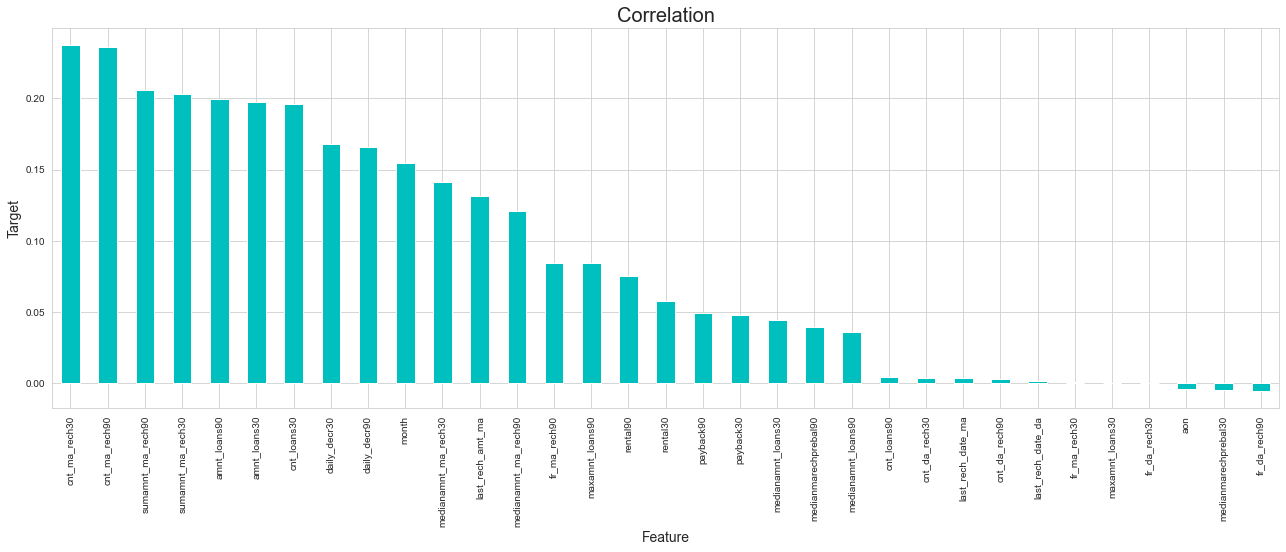

In [48]:
plt.figure(figsize=(22,7))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Target",fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

The highest positive correlation is with
- cnt_ma_reach30
- cnt_ma_reach90
- sumamnt_ma_reach30
- sumamnt_ma_reach90
- amnt_loans90
- amnt_loans30
- daily_decr30
- daily_decr90
- 


- - While negative correlation is with
- fr_da_reach90
- medianmarechprebal90
- aon

### Preprocessing pipeline

### checking Outliers


- As we have restiction for data loss, so we can-not remove outliers as there are a lot of them.
- Instead we will creat a def func for IQR
- Then replaced the outlier value with the higher value of the distribution.

##### we will be skiping target variable in preprocessing pipeline

aon
AxesSubplot(0.125,0.125;0.775x0.755)


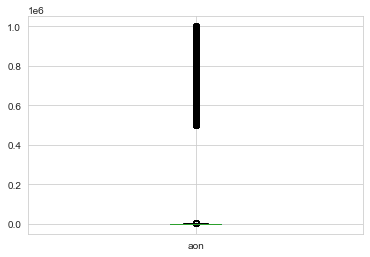

daily_decr30
AxesSubplot(0.125,0.125;0.775x0.755)


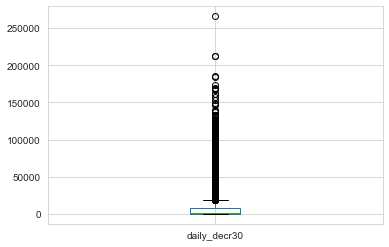

daily_decr90
AxesSubplot(0.125,0.125;0.775x0.755)


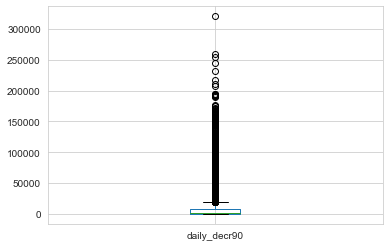

rental30
AxesSubplot(0.125,0.125;0.775x0.755)


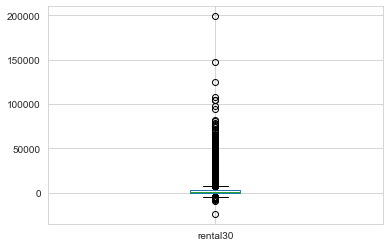

rental90
AxesSubplot(0.125,0.125;0.775x0.755)


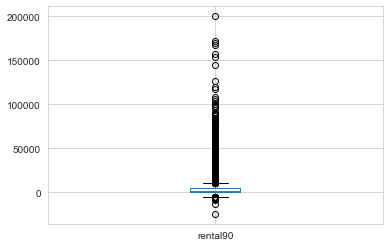

last_rech_date_ma
AxesSubplot(0.125,0.125;0.775x0.755)


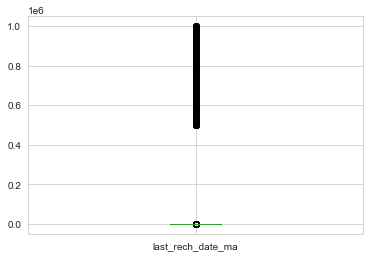

last_rech_date_da
AxesSubplot(0.125,0.125;0.775x0.755)


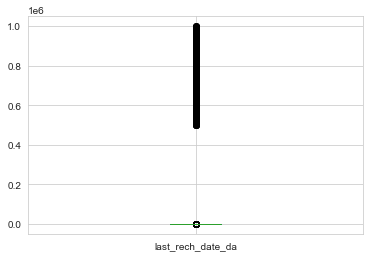

last_rech_amt_ma
AxesSubplot(0.125,0.125;0.775x0.755)


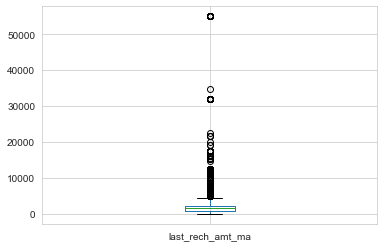

cnt_ma_rech30
AxesSubplot(0.125,0.125;0.775x0.755)


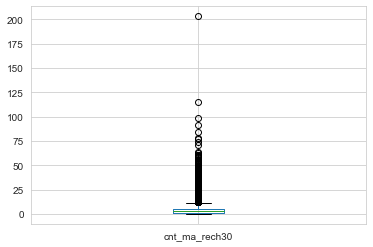

fr_ma_rech30
AxesSubplot(0.125,0.125;0.775x0.755)


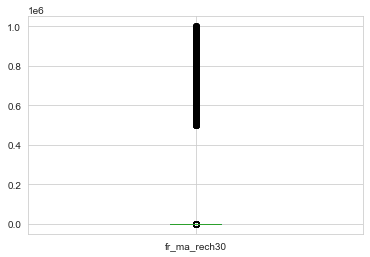

sumamnt_ma_rech30
AxesSubplot(0.125,0.125;0.775x0.755)


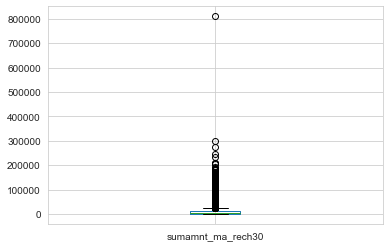

medianamnt_ma_rech30
AxesSubplot(0.125,0.125;0.775x0.755)


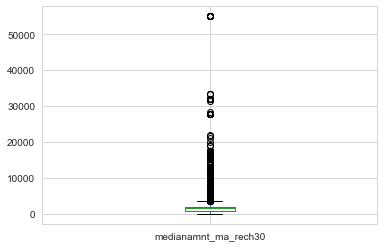

medianmarechprebal30
AxesSubplot(0.125,0.125;0.775x0.755)


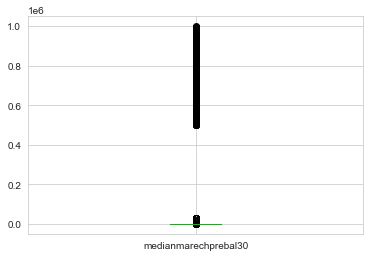

cnt_ma_rech90
AxesSubplot(0.125,0.125;0.775x0.755)


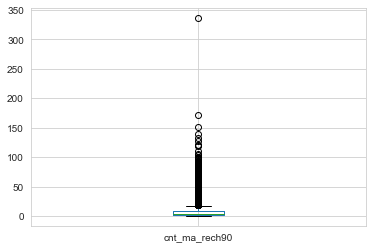

fr_ma_rech90
AxesSubplot(0.125,0.125;0.775x0.755)


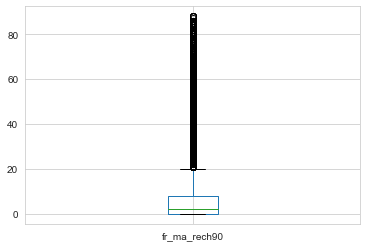

sumamnt_ma_rech90
AxesSubplot(0.125,0.125;0.775x0.755)


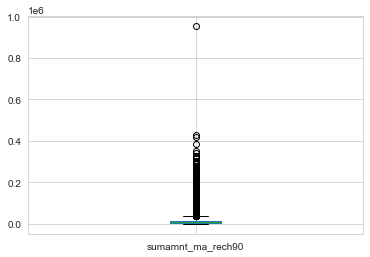

medianamnt_ma_rech90
AxesSubplot(0.125,0.125;0.775x0.755)


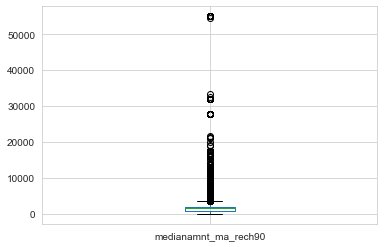

medianmarechprebal90
AxesSubplot(0.125,0.125;0.775x0.755)


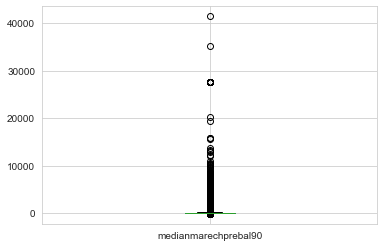

cnt_da_rech30
AxesSubplot(0.125,0.125;0.775x0.755)


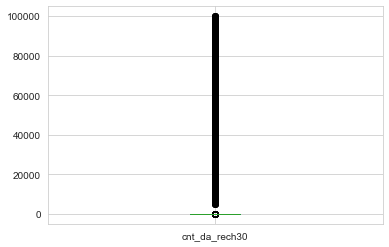

fr_da_rech30
AxesSubplot(0.125,0.125;0.775x0.755)


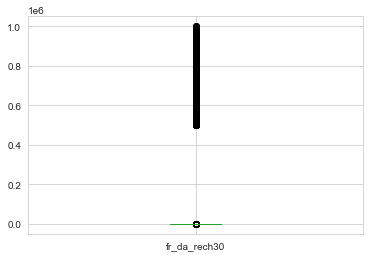

cnt_da_rech90
AxesSubplot(0.125,0.125;0.775x0.755)


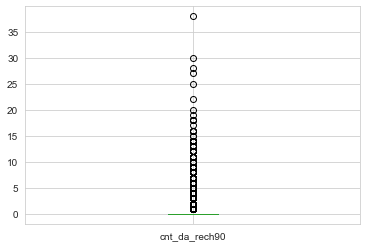

fr_da_rech90
AxesSubplot(0.125,0.125;0.775x0.755)


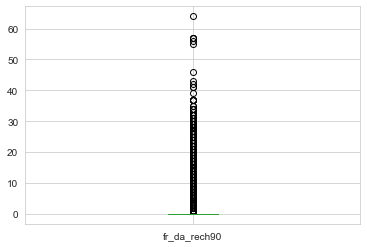

cnt_loans30
AxesSubplot(0.125,0.125;0.775x0.755)


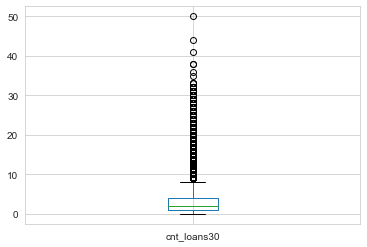

amnt_loans30
AxesSubplot(0.125,0.125;0.775x0.755)


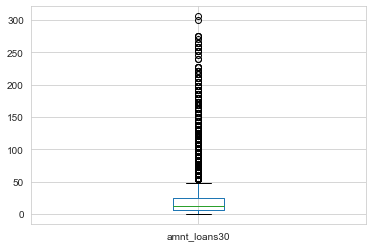

maxamnt_loans30
AxesSubplot(0.125,0.125;0.775x0.755)


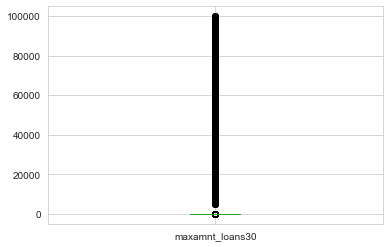

medianamnt_loans30
AxesSubplot(0.125,0.125;0.775x0.755)


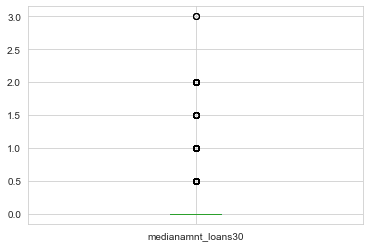

cnt_loans90
AxesSubplot(0.125,0.125;0.775x0.755)


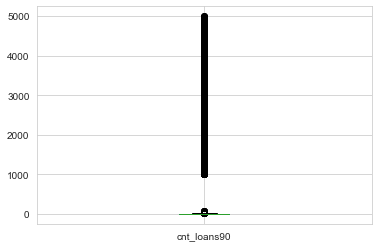

amnt_loans90
AxesSubplot(0.125,0.125;0.775x0.755)


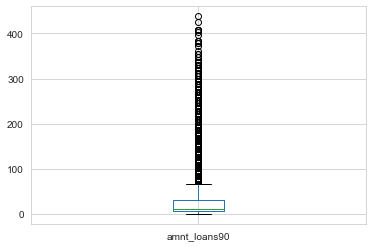

maxamnt_loans90
AxesSubplot(0.125,0.125;0.775x0.755)


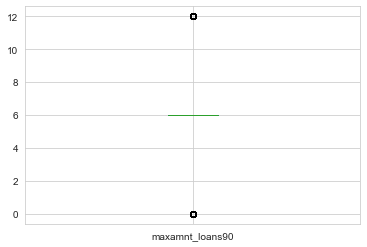

medianamnt_loans90
AxesSubplot(0.125,0.125;0.775x0.755)


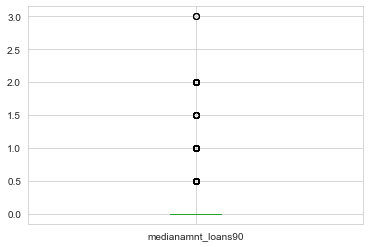

payback30
AxesSubplot(0.125,0.125;0.775x0.755)


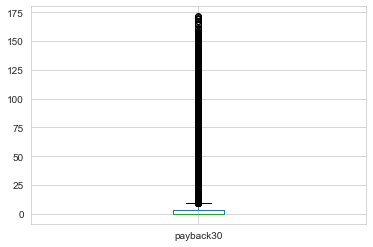

payback90
AxesSubplot(0.125,0.125;0.775x0.755)


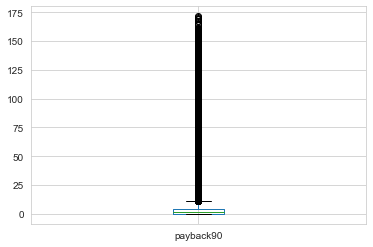

month
AxesSubplot(0.125,0.125;0.775x0.755)


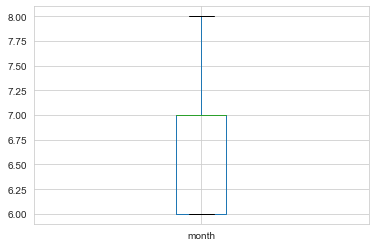

In [49]:
#checking outliers
for i in df.columns[1:]:
    print(i)
    print(df[i].plot.box())
    plt.show()

In [50]:
#function for detect Outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*1.5)
    return (lower_bridge,upper_bridge)

In [51]:
for i in df.columns[1:]:
    print(i)
    print(outlier_IQR(df,i))

aon
(-858.0, 2086.0)
daily_decr30
(-10759.9, 18046.34)
daily_decr90
(-11597.455000000016, 19442.937000000027)
rental30
(-4334.36, 7971.719999999999)
rental90
(-5552.035, 10054.085)
last_rech_date_ma
(-8.0, 16.0)
last_rech_date_da
(0.0, 0.0)
last_rech_amt_ma
(-1538.5, 4617.5)
cnt_ma_rech30
(-5.0, 11.0)
fr_ma_rech30
(-9.0, 15.0)
sumamnt_ma_rech30
(-11165.0, 22715.0)
medianamnt_ma_rech30
(-961.0, 3655.0)
medianmarechprebal30
(-97.0, 191.0)
cnt_ma_rech90
(-7.0, 17.0)
fr_ma_rech90
(-12.0, 20.0)
sumamnt_ma_rech90
(-18207.5, 36524.5)
medianamnt_ma_rech90
(-953.5, 3650.5)
medianmarechprebal90
(-82.46500000000003, 176.37500000000034)
cnt_da_rech30
(0.0, 0.0)
fr_da_rech30
(0.0, 0.0)
cnt_da_rech90
(0.0, 0.0)
fr_da_rech90
(0.0, 0.0)
cnt_loans30
(-3.5, 8.5)
amnt_loans30
(-21.0, 51.0)
maxamnt_loans30
(6.0, 6.0)
medianamnt_loans30
(0.0, 0.0)
cnt_loans90
(-5.0, 11.0)
amnt_loans90
(-30.0, 66.0)
maxamnt_loans90
(6.0, 6.0)
medianamnt_loans90
(0.0, 0.0)
payback30
(-5.625, 9.375)
payback90
(-6.75, 11.25)
m

In [52]:
#making function to treat outliers

def out(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*1.5)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*1.5)
    data_frame.loc[data_frame[feature_name]>=upper_bridge,feature_name] = upper_bridge
    data_frame.loc[data_frame[feature_name]<= lower_bridge,feature_name] = lower_bridge

In [53]:
for i in df.columns[1:]:
    out(df,i)

label
AxesSubplot(0.125,0.125;0.775x0.755)


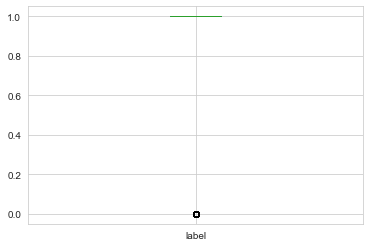

aon
AxesSubplot(0.125,0.125;0.775x0.755)


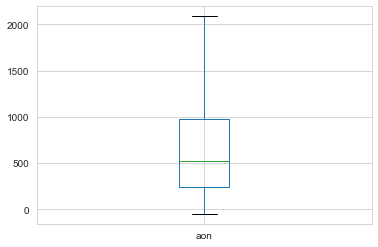

daily_decr30
AxesSubplot(0.125,0.125;0.775x0.755)


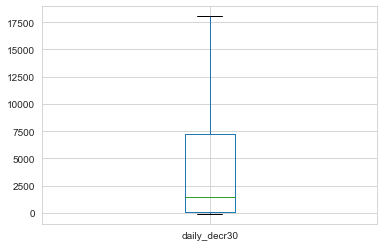

daily_decr90
AxesSubplot(0.125,0.125;0.775x0.755)


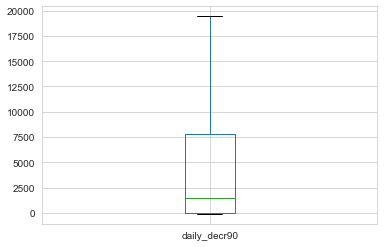

rental30
AxesSubplot(0.125,0.125;0.775x0.755)


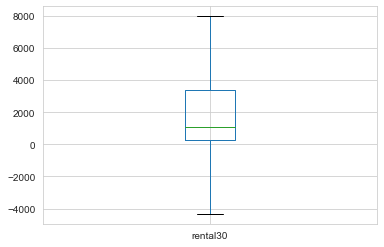

rental90
AxesSubplot(0.125,0.125;0.775x0.755)


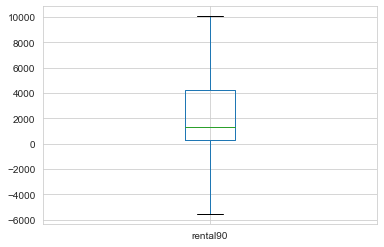

last_rech_date_ma
AxesSubplot(0.125,0.125;0.775x0.755)


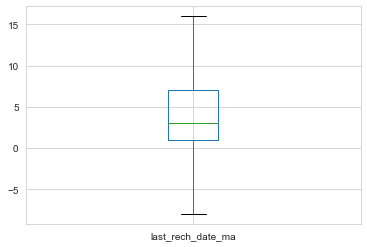

last_rech_date_da
AxesSubplot(0.125,0.125;0.775x0.755)


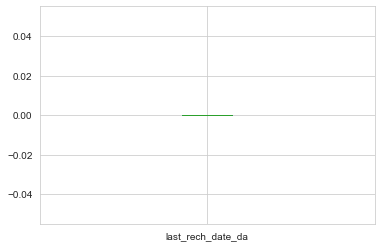

last_rech_amt_ma
AxesSubplot(0.125,0.125;0.775x0.755)


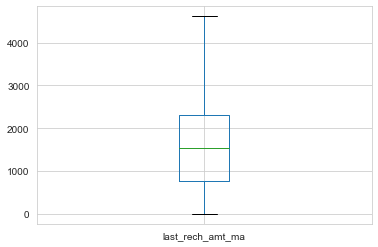

cnt_ma_rech30
AxesSubplot(0.125,0.125;0.775x0.755)


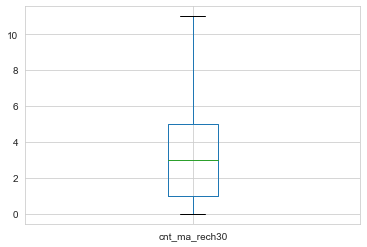

fr_ma_rech30
AxesSubplot(0.125,0.125;0.775x0.755)


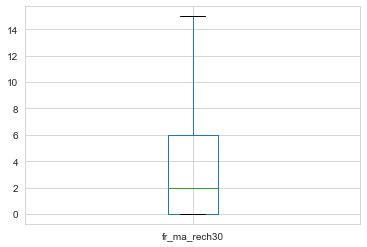

sumamnt_ma_rech30
AxesSubplot(0.125,0.125;0.775x0.755)


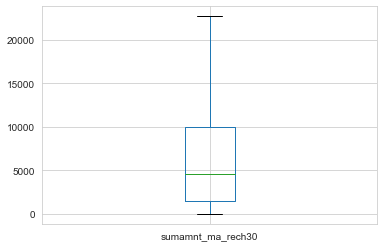

medianamnt_ma_rech30
AxesSubplot(0.125,0.125;0.775x0.755)


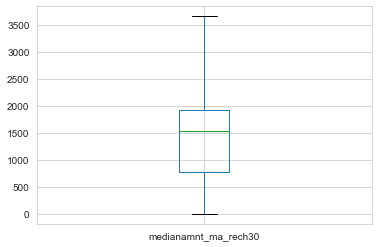

medianmarechprebal30
AxesSubplot(0.125,0.125;0.775x0.755)


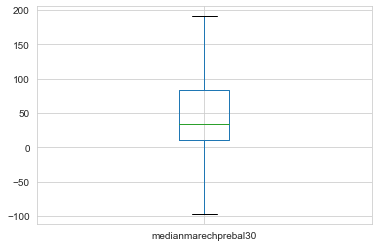

cnt_ma_rech90
AxesSubplot(0.125,0.125;0.775x0.755)


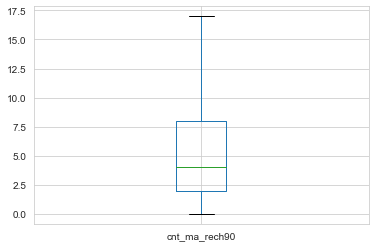

fr_ma_rech90
AxesSubplot(0.125,0.125;0.775x0.755)


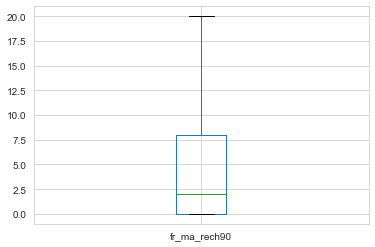

sumamnt_ma_rech90
AxesSubplot(0.125,0.125;0.775x0.755)


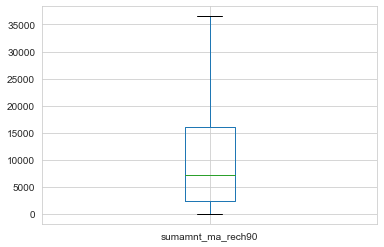

medianamnt_ma_rech90
AxesSubplot(0.125,0.125;0.775x0.755)


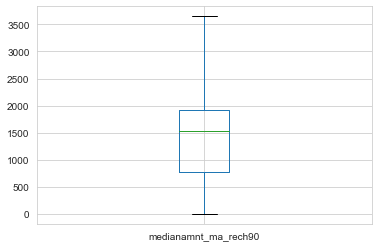

medianmarechprebal90
AxesSubplot(0.125,0.125;0.775x0.755)


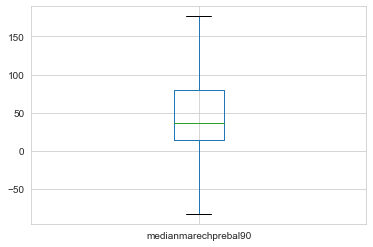

cnt_da_rech30
AxesSubplot(0.125,0.125;0.775x0.755)


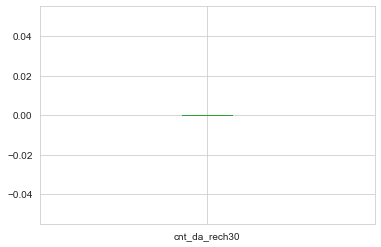

fr_da_rech30
AxesSubplot(0.125,0.125;0.775x0.755)


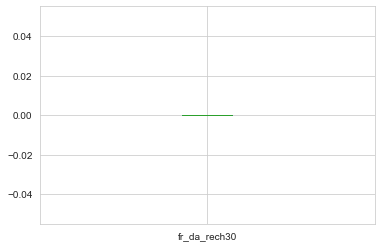

cnt_da_rech90
AxesSubplot(0.125,0.125;0.775x0.755)


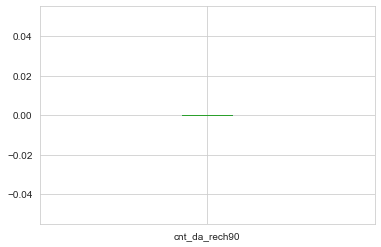

fr_da_rech90
AxesSubplot(0.125,0.125;0.775x0.755)


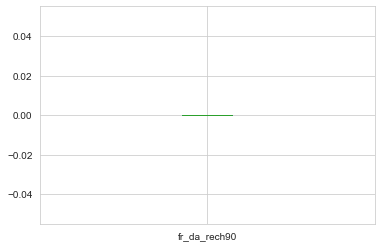

cnt_loans30
AxesSubplot(0.125,0.125;0.775x0.755)


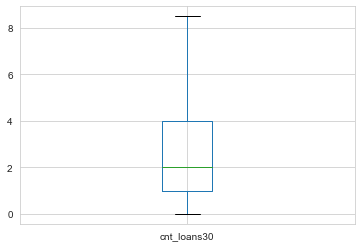

amnt_loans30
AxesSubplot(0.125,0.125;0.775x0.755)


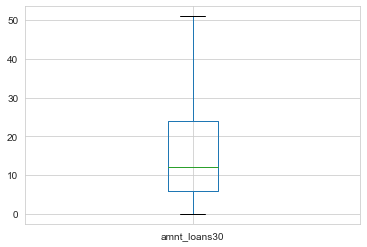

maxamnt_loans30
AxesSubplot(0.125,0.125;0.775x0.755)


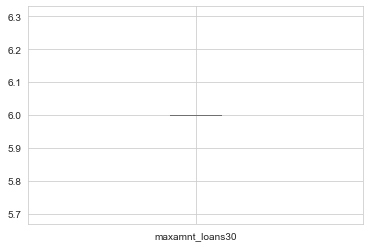

medianamnt_loans30
AxesSubplot(0.125,0.125;0.775x0.755)


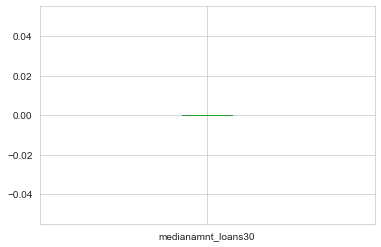

cnt_loans90
AxesSubplot(0.125,0.125;0.775x0.755)


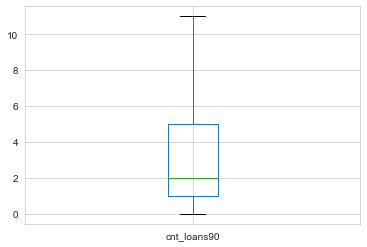

amnt_loans90
AxesSubplot(0.125,0.125;0.775x0.755)


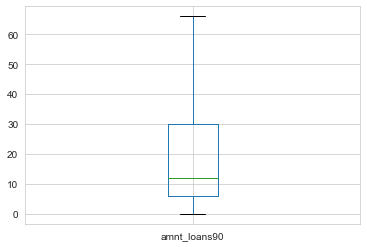

maxamnt_loans90
AxesSubplot(0.125,0.125;0.775x0.755)


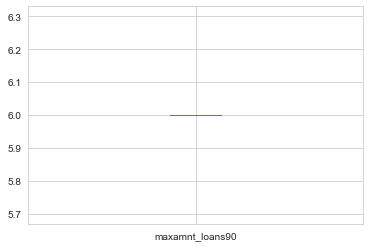

medianamnt_loans90
AxesSubplot(0.125,0.125;0.775x0.755)


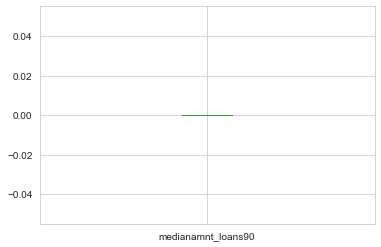

payback30
AxesSubplot(0.125,0.125;0.775x0.755)


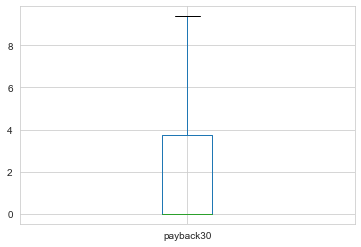

payback90
AxesSubplot(0.125,0.125;0.775x0.755)


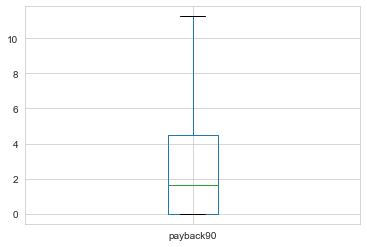

month
AxesSubplot(0.125,0.125;0.775x0.755)


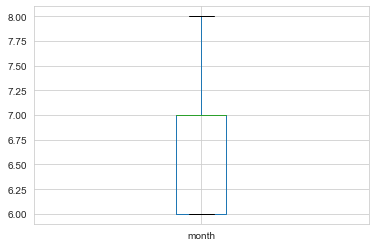

In [54]:
for i in df:
    print(i)
    print(df[i].plot.box())
    plt.show()

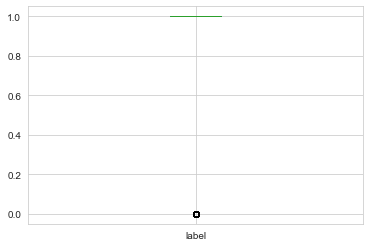

In [55]:
# As we see here target column is still as it is. (i.e.) no outliers were removed in the process.
df.boxplot(column='label')

In [56]:
df['label'].unique()

array([0, 1], dtype=int64)

### Splitting  data into features and target

In [57]:
features=df.drop('label',axis=1)
target=df["label"]

In [58]:
features

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,2.0,15.0,...,12.0,6.0,0.0,2.0,12.0,6.0,0.0,9.375000,11.250000,7.0
1,712.0,12122.000000,12124.750000,3691.26,3691.26,16.0,0.0,4617.5,1.0,0.0,...,12.0,6.0,0.0,1.0,12.0,6.0,0.0,0.000000,0.000000,8.0
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,1.0,0.0,...,6.0,6.0,0.0,1.0,6.0,6.0,0.0,0.000000,0.000000,8.0
3,241.0,21.228000,21.228000,159.42,159.42,16.0,0.0,947.0,0.0,0.0,...,12.0,6.0,0.0,2.0,12.0,6.0,0.0,0.000000,0.000000,6.0
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,7.0,2.0,...,42.0,6.0,0.0,7.0,42.0,6.0,0.0,2.333333,2.333333,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048.0,3.0,2.0,...,12.0,6.0,0.0,2.0,12.0,6.0,0.0,1.000000,1.000000,6.0
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773.0,4.0,1.0,...,18.0,6.0,0.0,3.0,18.0,6.0,0.0,1.000000,1.000000,6.0
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539.0,5.0,8.0,...,42.0,6.0,0.0,6.0,54.0,6.0,0.0,4.000000,3.833333,7.0
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,0.0,773.0,5.0,4.0,...,18.0,6.0,0.0,3.0,24.0,6.0,0.0,0.000000,10.500000,7.0


In [59]:
target

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

#### Treating skewness
- Using PowerTransform

In [60]:
features.skew()

aon                     0.947127
daily_decr30            1.239231
daily_decr90            1.238995
rental30                1.192510
rental90                1.193291
last_rech_date_ma       1.040301
last_rech_date_da       0.000000
last_rech_amt_ma        1.003446
cnt_ma_rech30           0.904157
fr_ma_rech30            1.253282
sumamnt_ma_rech30       1.080771
medianamnt_ma_rech30    0.728219
medianmarechprebal30    0.988628
cnt_ma_rech90           0.934789
fr_ma_rech90            1.172479
sumamnt_ma_rech90       1.126421
medianamnt_ma_rech90    0.763904
medianmarechprebal90    0.957933
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             1.340348
amnt_loans30            1.231090
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
cnt_loans90             1.281861
amnt_loans90            1.217940
maxamnt_loans90         0.000000
medianamnt_loans90      0.000000
payback30 

In [61]:
# keeping the threshold value (+-.5)

In [62]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
pt_fit = pt.fit_transform(features)
pt_fit = pd.DataFrame(pt_fit,columns= features.columns)
features = pt_fit

In [63]:
features.skew()

aon                     0.303288
daily_decr30           -5.145302
daily_decr90           -5.361851
rental30                0.133157
rental90                0.083529
last_rech_date_ma      -0.125348
last_rech_date_da       0.000000
last_rech_amt_ma       -0.336663
cnt_ma_rech30          -0.033368
fr_ma_rech30            0.118452
sumamnt_ma_rech30      -0.452785
medianamnt_ma_rech30   -0.555924
medianmarechprebal30    0.054210
cnt_ma_rech90          -0.040754
fr_ma_rech90            0.091461
sumamnt_ma_rech90      -0.356097
medianamnt_ma_rech90   -0.430848
medianmarechprebal90    0.179317
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.044046
amnt_loans30            0.005370
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
cnt_loans90             0.092294
amnt_loans90           -0.000218
maxamnt_loans90         0.000000
medianamnt_loans90      0.000000
payback30 

In [64]:
features.shape , target.shape

((209593, 33), (209593,))

### Scaling features

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler ( feature_range=(0,1),copy=True).fit(features)
df1_scaler = scaler.transform(features)
features = pd.DataFrame(df1_scaler)
features.head(10)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.514861,0.988706,0.988709,0.802789,0.825933,0.667464,0.0,0.592273,0.396555,1.000000,...,0.604197,0.0,0.0,0.582275,0.607963,0.0,0.0,1.000000,1.000000,0.585862
1,0.665671,0.996999,0.996588,0.899120,0.894486,1.000000,0.0,1.000000,0.242530,0.000000,...,0.604197,0.0,0.0,0.400684,0.607963,0.0,0.0,0.000000,0.000000,1.000000
2,0.610379,0.985166,0.985309,0.824536,0.840700,0.699010,0.0,0.592273,0.242530,0.000000,...,0.444141,0.0,0.0,0.400684,0.460647,0.0,0.0,0.000000,0.000000,1.000000
3,0.501885,0.974797,0.975313,0.800582,0.823294,1.000000,0.0,0.468667,0.000000,0.000000,...,0.604197,0.0,0.0,0.582275,0.607963,0.0,0.0,0.000000,0.000000,0.000000
4,0.732456,0.978267,0.978676,0.830383,0.844932,0.728192,0.0,0.719230,0.810328,0.476122,...,0.942498,0.0,0.0,0.903967,0.893707,0.0,0.0,0.651277,0.571369,0.000000
5,0.621100,0.987250,0.987310,0.807883,0.828906,0.667464,0.0,0.592273,0.604443,0.900133,...,0.707241,0.0,0.0,0.692068,0.698458,0.0,0.0,1.000000,0.923402,0.585862
6,0.613650,0.988407,0.988420,0.806795,0.829455,0.940170,0.0,1.000000,0.242530,0.000000,...,0.444141,0.0,0.0,0.400684,0.460647,0.0,0.0,0.000000,0.000000,0.585862
7,0.682176,0.997451,0.999332,0.824543,0.873559,0.728192,0.0,0.837480,0.511667,0.581592,...,0.707241,0.0,0.0,0.903967,0.893707,0.0,0.0,0.900061,0.712522,1.000000
8,0.796176,0.977185,0.977630,0.863169,0.868604,0.632432,0.0,0.592273,0.604443,0.314683,...,0.784191,0.0,0.0,0.767777,0.763990,0.0,0.0,0.688437,0.608586,0.000000
9,0.610707,0.975250,0.975754,0.815778,0.834351,0.898075,0.0,0.424712,0.242530,0.000000,...,0.444141,0.0,0.0,0.400684,0.460647,0.0,0.0,0.000000,0.000000,0.000000


### Balancing the Imbalanced target variable

In [66]:
from sklearn.model_selection import train_test_split
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.30,random_state=42)

In [67]:
from imblearn.over_sampling import SMOTE

x, y = SMOTE(k_neighbors=3).fit_resample(features, target)

In [68]:
x

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.514861,0.988706,0.988709,0.802789,0.825933,0.667464,0.0,0.592273,0.396555,1.000000,...,0.604197,0.0,0.0,0.582275,0.607963,0.0,0.0,1.000000,1.000000,0.585862
1,0.665671,0.996999,0.996588,0.899120,0.894486,1.000000,0.0,1.000000,0.242530,0.000000,...,0.604197,0.0,0.0,0.400684,0.607963,0.0,0.0,0.000000,0.000000,1.000000
2,0.610379,0.985166,0.985309,0.824536,0.840700,0.699010,0.0,0.592273,0.242530,0.000000,...,0.444141,0.0,0.0,0.400684,0.460647,0.0,0.0,0.000000,0.000000,1.000000
3,0.501885,0.974797,0.975313,0.800582,0.823294,1.000000,0.0,0.468667,0.000000,0.000000,...,0.604197,0.0,0.0,0.582275,0.607963,0.0,0.0,0.000000,0.000000,0.000000
4,0.732456,0.978267,0.978676,0.830383,0.844932,0.728192,0.0,0.719230,0.810328,0.476122,...,0.942498,0.0,0.0,0.903967,0.893707,0.0,0.0,0.651277,0.571369,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366857,0.648576,0.985508,0.985650,0.820613,0.839882,0.810193,0.0,0.423910,0.750349,0.658579,...,0.642592,0.0,0.0,0.582275,0.641682,0.0,0.0,1.000000,0.981435,0.585862
366858,0.664087,0.985982,0.986179,0.921525,0.950697,0.929907,0.0,0.837480,0.242530,0.000000,...,0.444141,0.0,0.0,0.400684,0.460647,0.0,0.0,0.000000,0.000000,0.585862
366859,0.510081,0.987097,0.987233,0.755951,0.757337,0.907678,0.0,0.634761,0.242530,0.000000,...,0.604197,0.0,0.0,0.582275,0.607963,0.0,0.0,0.000000,1.000000,0.585862
366860,0.831590,0.974373,0.974900,0.797217,0.820830,0.743535,0.0,0.423988,0.511667,0.705089,...,0.604197,0.0,0.0,0.582275,0.607963,0.0,0.0,1.000000,0.984436,0.000000


In [69]:
y

0         0
1         1
2         1
3         1
4         1
         ..
366857    0
366858    0
366859    0
366860    0
366861    0
Name: label, Length: 366862, dtype: int64

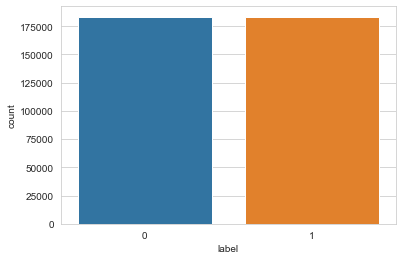

In [70]:
sns.countplot(y)

### PCA

In [71]:
from sklearn import decomposition
from sklearn.decomposition import PCA
# Creating a Covariance Matrix
covar_matrix = PCA(n_components = 33)

In [72]:

#Calculate Eigenvalues
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([52.8, 67.1, 75.6, 82.5, 87.3, 89.9, 91.9, 93.6, 95.1, 96.5, 97.4,
       98.1, 98.5, 98.9, 99.2, 99.4, 99.6, 99.8, 99.9, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9])

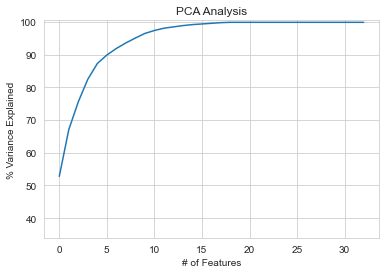

In [73]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(34,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [74]:
x.shape

(366862, 33)

In [75]:
pca=PCA(n_components=15)
x=pca.fit_transform(x)
x.shape

(366862, 15)

### Modeling

In [76]:
#Algorithms:-
   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [77]:
LOR=LogisticRegression(class_weight="balanced")
GNB=GaussianNB()
DTC=DecisionTreeClassifier(random_state=180)
SVC = SVC()
RFR = RandomForestClassifier()
KNN= KNeighborsClassifier()

In [78]:
#using logistic regression finding best random state

# taking test size as 30%


maxAccu=0
maxRS= 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LOR.fit(x_train,y_train)
    predLOR=LOR.predict(x_test)
    acc=accuracy_score(y_test, predLOR)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
   
        
print('Best accuracy is',maxAccu,' on Random_state', maxRS)

Best accuracy is 0.77142260060513  on Random_state 142


In [79]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=148,stratify=y)

In [80]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(256803, 15) (110059, 15)
(256803,) (110059,)


In [81]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('DecisionTreeClassifier',DTC))

models.append(('RandomForestClassifier',RFR))
models.append(('KNeighborsClassifier',KNN))

**************** LogisticRegression ****************


LogisticRegression(class_weight='balanced')


ACCURACY SCORE IS =  0.768905768724048


CROSS_VAL_SCORE =  0.7687768253077945


ROC_AUC_SCORE =  0.7689058778440603


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.76      0.78      0.77     55029
           1       0.78      0.76      0.77     55030

    accuracy                           0.77    110059
   macro avg       0.77      0.77      0.77    110059
weighted avg       0.77      0.77      0.77    110059



CONFUSION MATRIX [[42973 12056]
 [13378 41652]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


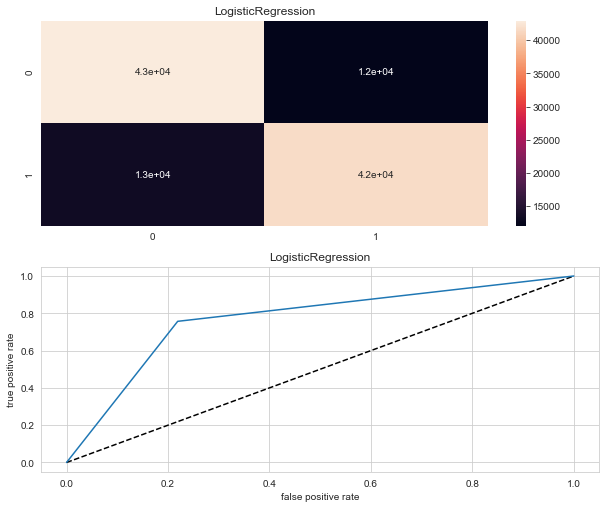




**************** GaussianNB ****************


GaussianNB()


ACCURACY SCORE IS =  0.7379042150119481


CROSS_VAL_SCORE =  0.7364486281819713


ROC_AUC_SCORE =  0.7379043304036604


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.73      0.75      0.74     55029
           1       0.74      0.73      0.73     55030

    accuracy                           0.74    110059
   macro avg       0.74      0.74      0.74    110059
weighted avg       0.74      0.74      0.74    110059



CONFUSION MATRIX [[41305 13724]
 [15122 39908]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


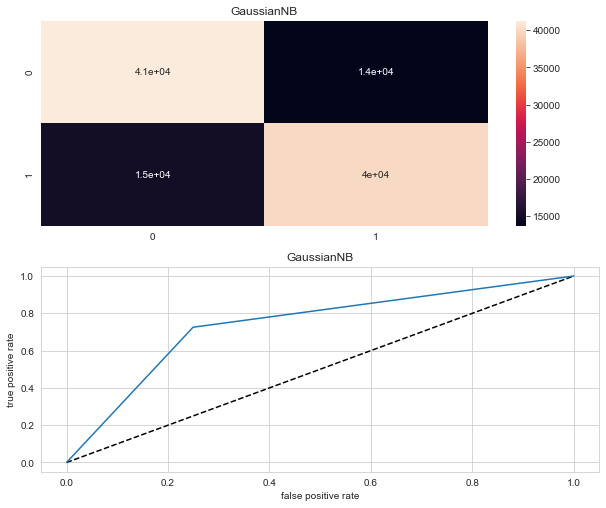




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(random_state=180)


ACCURACY SCORE IS =  0.8633823676391753


CROSS_VAL_SCORE =  0.8750157292230429


ROC_AUC_SCORE =  0.8633825954825788


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.85      0.89      0.87     55029
           1       0.88      0.84      0.86     55030

    accuracy                           0.86    110059
   macro avg       0.86      0.86      0.86    110059
weighted avg       0.86      0.86      0.86    110059



CONFUSION MATRIX [[48891  6138]
 [ 8898 46132]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


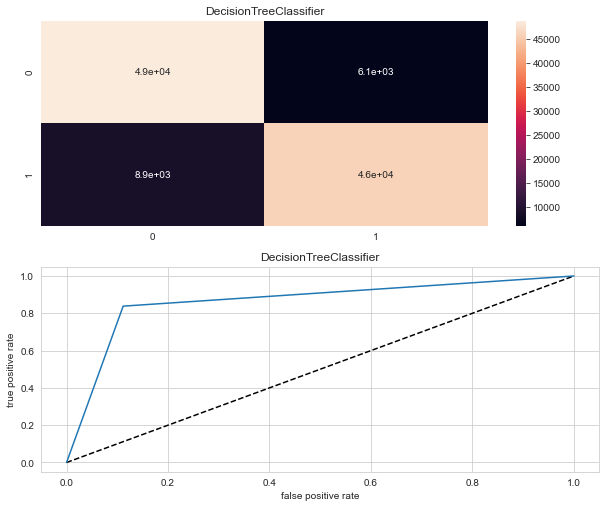




**************** RandomForestClassifier ****************


RandomForestClassifier()


ACCURACY SCORE IS =  0.9201700905877757


CROSS_VAL_SCORE =  0.9304343670048855


ROC_AUC_SCORE =  0.9201703461746981


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.90      0.95      0.92     55029
           1       0.95      0.89      0.92     55030

    accuracy                           0.92    110059
   macro avg       0.92      0.92      0.92    110059
weighted avg       0.92      0.92      0.92    110059



CONFUSION MATRIX [[52184  2845]
 [ 5941 49089]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


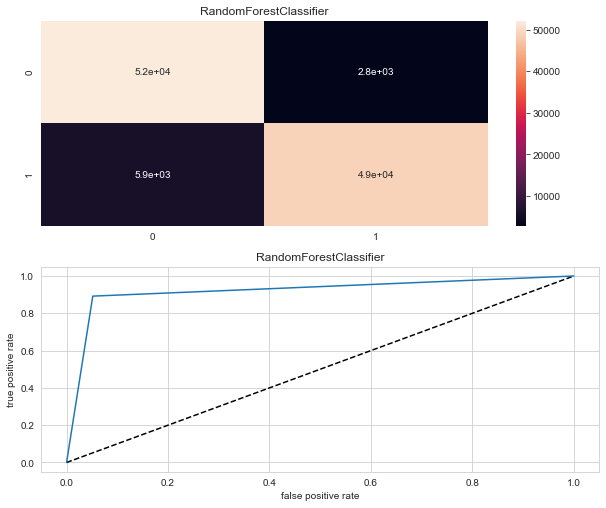




**************** KNeighborsClassifier ****************


KNeighborsClassifier()


ACCURACY SCORE IS =  0.8809365885570467


CROSS_VAL_SCORE =  0.8903620716843508


ROC_AUC_SCORE =  0.8809375100377831


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.82      0.98      0.89     55029
           1       0.98      0.78      0.87     55030

    accuracy                           0.88    110059
   macro avg       0.90      0.88      0.88    110059
weighted avg       0.90      0.88      0.88    110059



CONFUSION MATRIX [[54058   971]
 [12133 42897]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


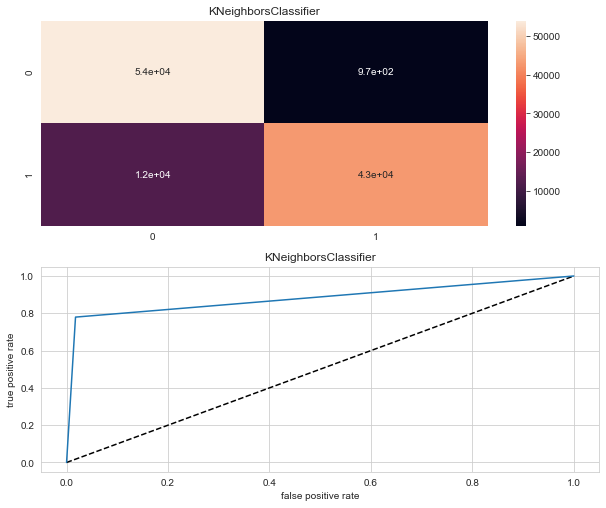

In [82]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

In [83]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,76.890577,76.877683,76.890588
1,GaussianNB,73.790422,73.644863,73.790433
2,DecisionTreeClassifier,86.338237,87.501573,86.338260
3,RandomForestClassifier,92.017009,93.043437,92.017035
4,KNeighborsClassifier,88.093659,89.036207,88.093751


### Hyper-Parameter Tunning

In [84]:
from sklearn.model_selection import GridSearchCV

In [92]:
parameters = {'max_depth':np.arange(2,15),
             'criterion':['gini','entropy']}

In [113]:
clf = GridSearchCV(RFR,param_grid=parameters,cv=10, verbose=True, n_jobs=-1)

In [114]:
best_clf = clf.fit(x,y)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


In [115]:
best_clf.best_estimator_

RandomForestClassifier(max_depth=14)

In [116]:
print(f'Accuracy::  {best_clf.score(x,y):.3f}')

Accuracy::  0.871


In [ ]:
The acuracy score for Grid Search Cv is 87%

In [ ]:
Selected model = RandomForestClassifier